In [4]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


<ipython-input-7-2871891f210e>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




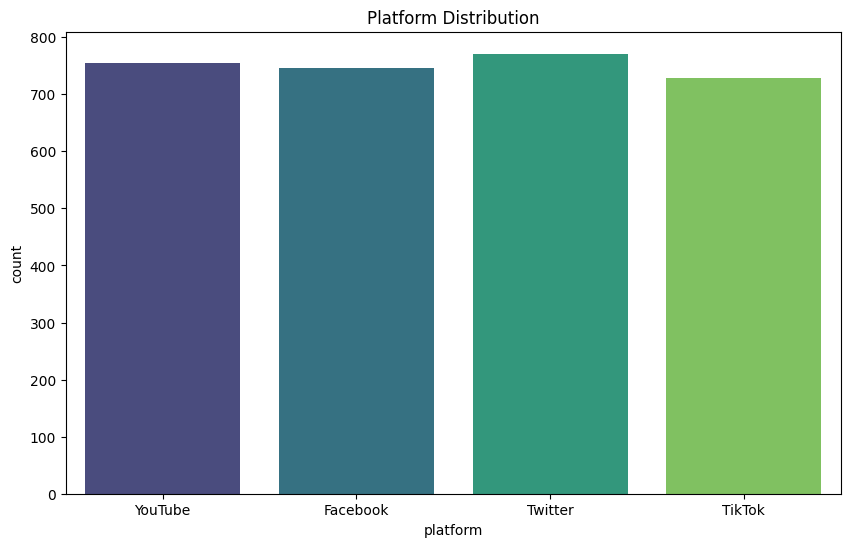

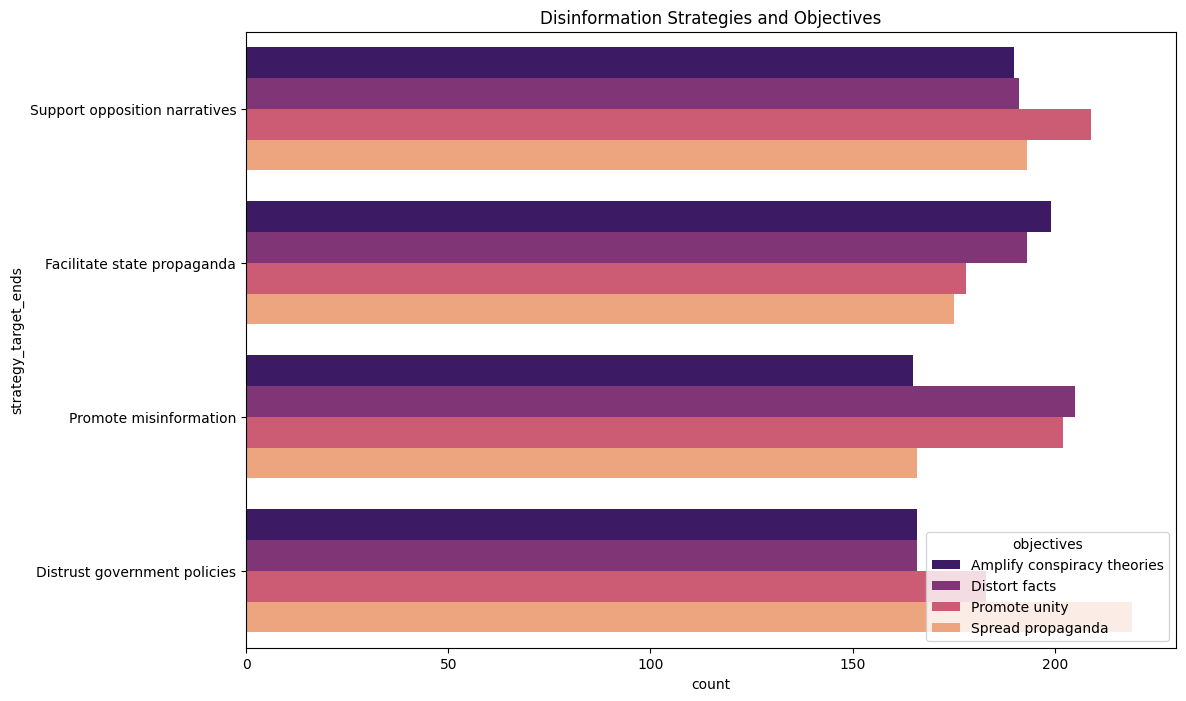

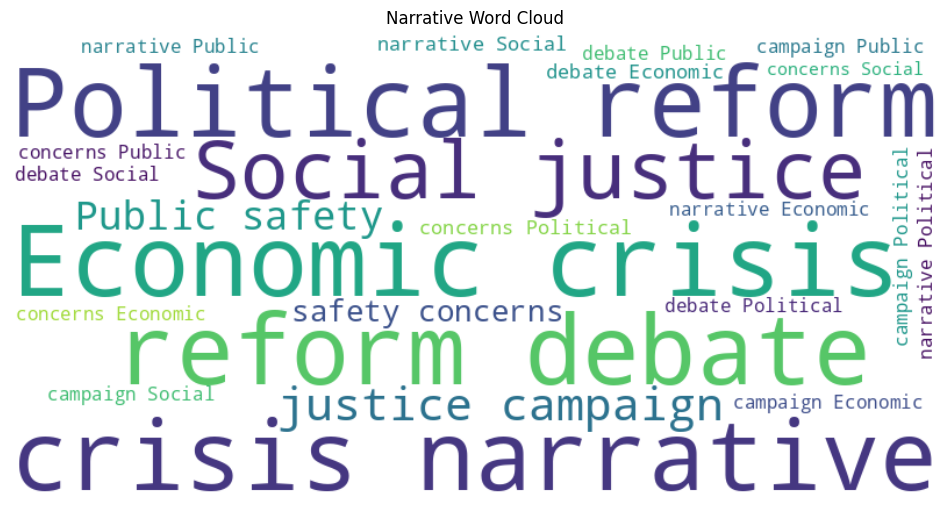

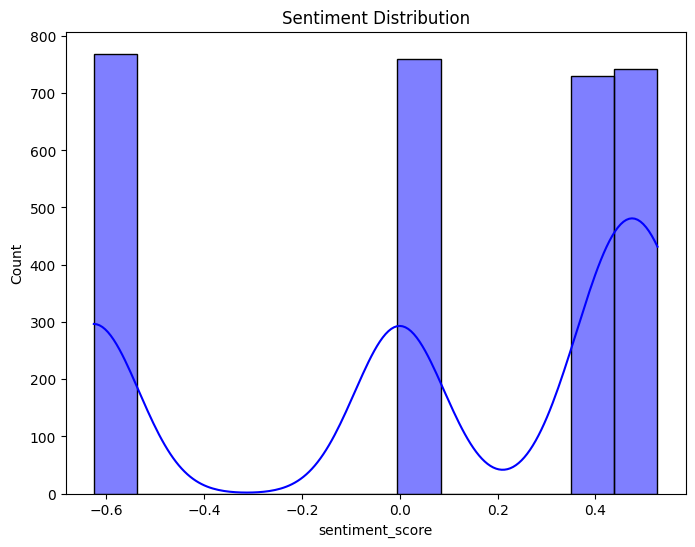

Topic 0:
safety campaign justice social debate political reform narrative economic crisis
Topic 1:
safety debate political reform crisis economic narrative social justice campaign
Topic 2:
social debate political reform crisis economic narrative concerns safety public
Topic 3:
safety campaign justice social crisis economic narrative political reform debate
Topic 4:
social debate political reform crisis economic narrative public safety concerns


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report:
               precision    recall  f1-score   support

    Facebook       0.00      0.00      0.00       222
      TikTok       0.28      0.29      0.28       224
     Twitter       0.26      0.51      0.34       226
     YouTube       0.25      0.24      0.25       228

    accuracy                           0.26       900
   macro avg       0.20      0.26      0.22       900
weighted avg       0.20      0.26      0.22       900



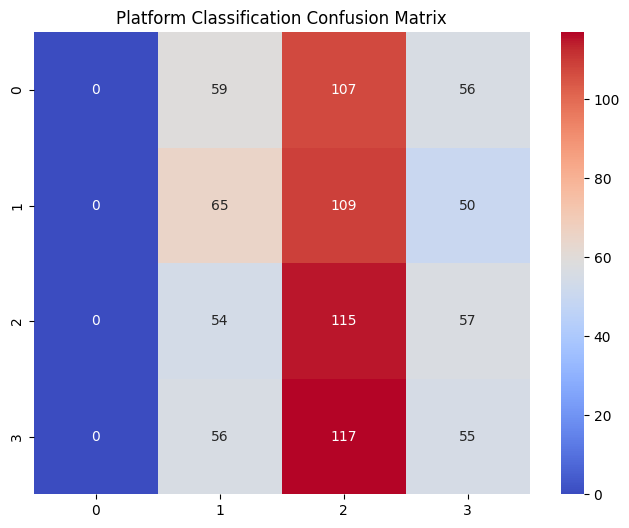

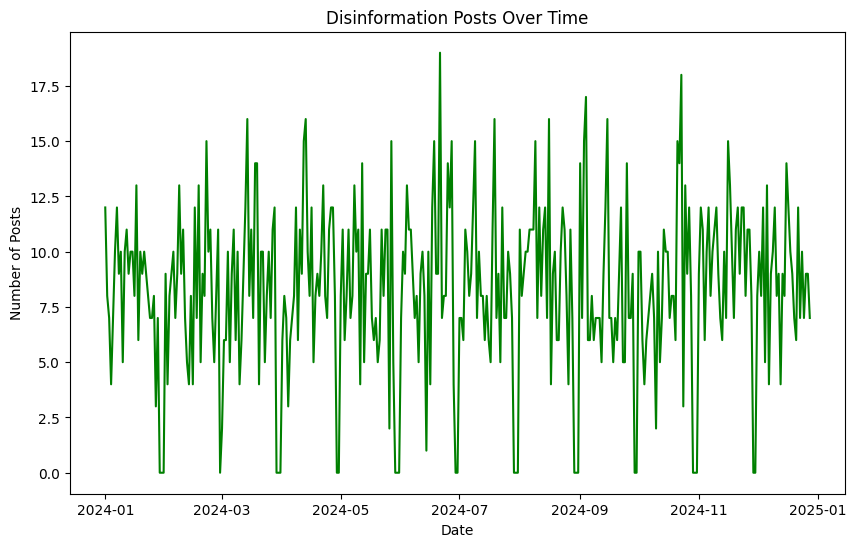

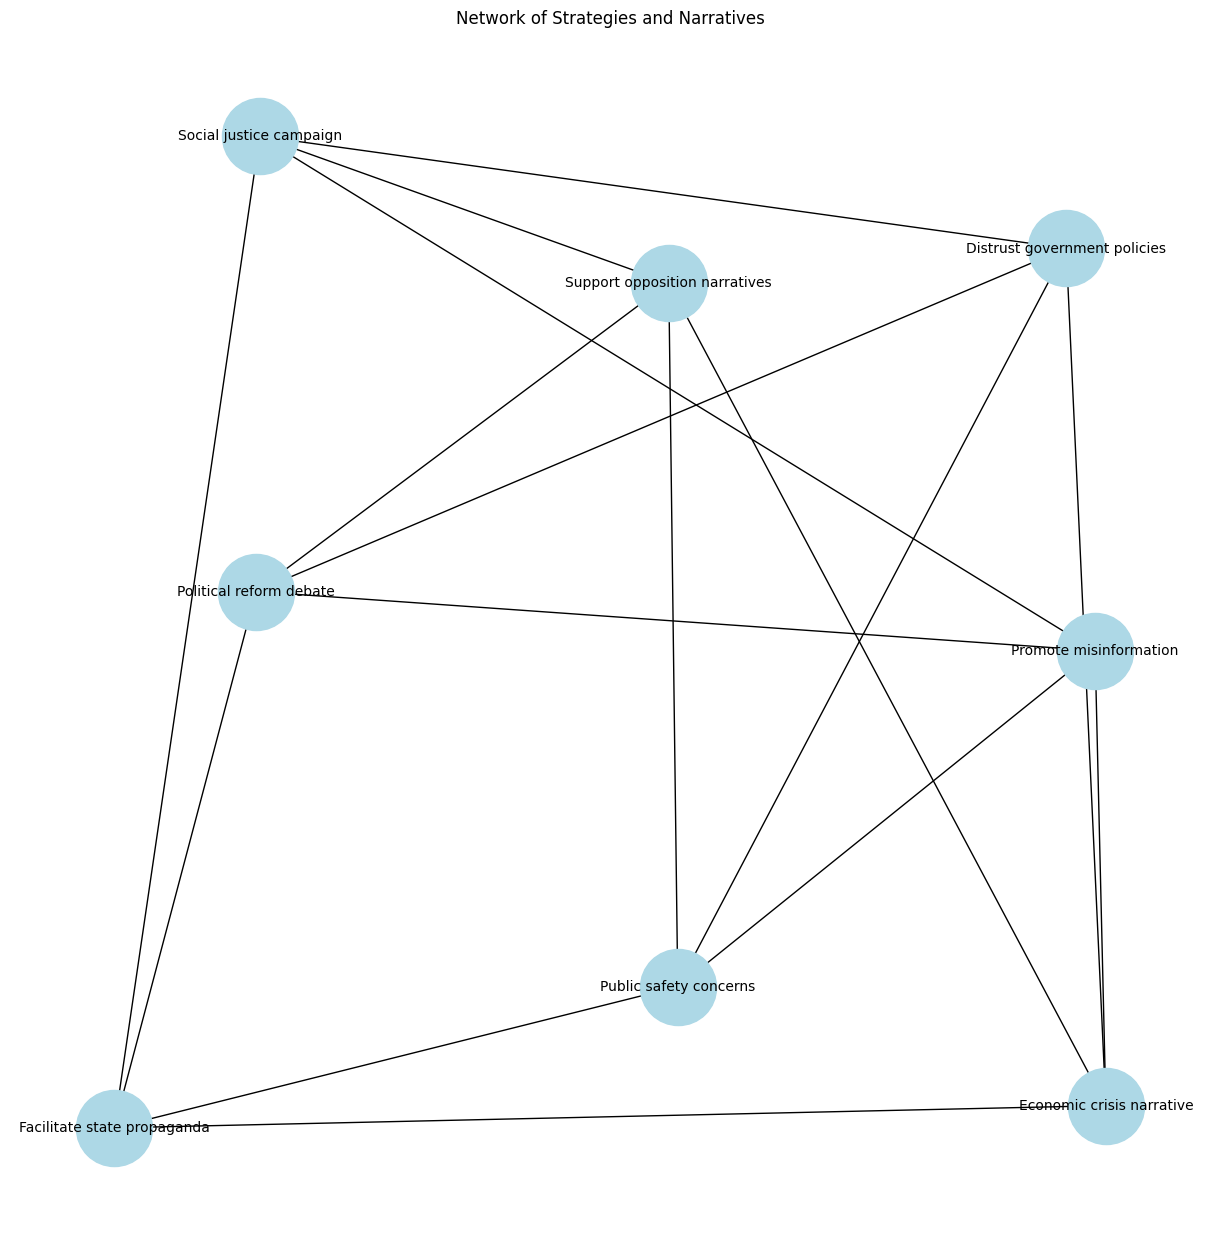

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load CSV File
file_path = ''  # Path to your CSV
df = pd.read_csv(file_path)

### 1. Data Preprocessing
df.dropna(subset=['narrative', 'content'], inplace=True)  # Drop rows with missing narratives or content
df['post_date'] = pd.to_datetime(df['post_date'])  # Convert dates to datetime format

### 2. Descriptive Analytics

# Plot Platform Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='platform', palette='viridis')
plt.title('Platform Distribution')
plt.show()

# Disinformation Strategies and Objectives Frequency
plt.figure(figsize=(12, 8))
sns.countplot(y='strategy_target_ends', hue='objectives', data=df, palette='magma')
plt.title("Disinformation Strategies and Objectives")
plt.show()

### 3. Narrative Word Cloud
all_text = " ".join(df['narrative'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Narrative Word Cloud")
plt.show()

### 4. Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['narrative'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.show()

### 5. Topic Modeling with LDA
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['narrative'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(X)

# Visualizing Topics
topic_words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}:")
    print(" ".join([topic_words[i] for i in topic.argsort()[-10:]]))

### 6. Classification Analysis (Platform Prediction)
X_train, X_test, y_train, y_test = train_test_split(X, df['platform'], test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Platform Classification Confusion Matrix")
plt.show()

### 7. Time-Series Analysis
df.set_index('post_date', inplace=True)
daily_posts = df.resample('D').size()

plt.figure(figsize=(10, 6))
plt.plot(daily_posts, color='green')
plt.title('Disinformation Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

### 8. Network Analysis (Strategy-Narrative Relationship)
from networkx import Graph, draw_networkx
import networkx as nx

G = nx.from_pandas_edgelist(df, 'strategy_target_ends', 'narrative')
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color='lightblue', font_size=10, node_size=3000)
plt.title("Network of Strategies and Narratives")
plt.show()

### 9. Interactive Visualization with Plotly
# Adjust sentiment scores for size to be non-negative
df['sentiment_score_for_size'] = df['sentiment_score'] + 1  # Shift scores to start from 0

fig = px.scatter(df, x='strategy_target_audience', y='sentiment_score',
                 color='platform', size='sentiment_score_for_size', # Use the adjusted column
                 hover_data=['narrative', 'content'], title='Strategy Sentiment Analysis')
fig.show()
